In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Customer_segmentation_next_bit/data.csv",encoding='unicode-escape')

In [ ]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12-01-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12-01-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12-01-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12-01-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12-01-2010 08:26,3.39,17850.0,United Kingdom


In [ ]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [ ]:
df.isnull().any()

InvoiceNo      False
StockCode      False
Description     True
Quantity       False
InvoiceDate    False
UnitPrice      False
CustomerID      True
Country        False
dtype: bool

In [ ]:
df['CustomerID'].isna().sum()

135080

In [ ]:
#Removing null values from the dataset
df = df[df['CustomerID'].notnull()]

In [ ]:
df.isnull().any()

InvoiceNo      False
StockCode      False
Description    False
Quantity       False
InvoiceDate    False
UnitPrice      False
CustomerID     False
Country        False
dtype: bool

In [ ]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,406829.000000,406829.000000,406829.000000
mean,12.061303,3.460471,15287.690570
std,248.693370,69.315162,1713.600303
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,13953.000000
50%,5.000000,1.950000,15152.000000
75%,12.000000,3.750000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [ ]:
#percentile to evaluate quantity distribution
print("Percentile of Quantity:\n", df['Quantity'].quantile([0.0,0.001,0.1,0.5,0.9,0.99,0.999]))
print("Percentile of Unit Price:\n", df['UnitPrice'].quantile([0.0,0.001,0.1,0.5,0.9,0.99,0.999]))

Percentile of Quantity:
 0.000   -80995.0
0.001      -40.0
0.100        1.0
0.500        5.0
0.900       24.0
0.990      120.0
0.999      504.0
Name: Quantity, dtype: float64
Percentile of Unit Price:
 0.000     0.00
0.001     0.12
0.100     0.55
0.500     1.95
0.900     6.75
0.990    15.00
0.999    50.00
Name: UnitPrice, dtype: float64


In [ ]:
#Removing outliers
df = df[df['Quantity']<= 600]
df = df[df['Quantity']>=-600]
df = df[df['UnitPrice']<=500]

In [ ]:
#Converting string date time to python date time format
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [ ]:
df.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object

In [ ]:
#Creating a new column of sales 
df['sales'] = df['Quantity']*df['UnitPrice']

In [ ]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,sales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [ ]:
#Grouping customers by total quantity purchased by each customer and the total sales amount generated per customer
user_data_1 = df.groupby('CustomerID').agg(total_quantity = ('Quantity',np.sum),total_sales = ('sales',np.sum)).reset_index()

In [ ]:
user_data_1.head()

,CustomerID,total_quantity,total_sales
0,12347.0,2458,4310.00
1,12348.0,2341,1797.24
2,12349.0,631,1757.55
3,12350.0,197,334.40
4,12352.0,470,1545.41


In [ ]:
#Grouping customers by max and min visit dates and total number of visits
user_data_2 = df.groupby('CustomerID').agg(Max_Date = ('InvoiceDate',np.max),Min_Date = ('InvoiceDate',np.min),Total_visits = ('InvoiceDate',pd.Series.nunique)).reset_index()

In [ ]:
user_data_2.head()

,CustomerID,Max_Date,Min_Date,Total_visits
0,12347.0,2011-12-07 15:52:00,2010-12-07 14:57:00,7
1,12348.0,2011-09-25 13:13:00,2010-12-16 19:09:00,4
2,12349.0,2011-11-21 09:51:00,2011-11-21 09:51:00,1
3,12350.0,2011-02-02 16:01:00,2011-02-02 16:01:00,1
4,12352.0,2011-11-03 14:37:00,2011-02-16 12:33:00,11


In [ ]:
user_data_2['last_date'] = max(user_data_2['Max_Date'])
user_data_2['last_visit'] = user_data_2['last_date'] - user_data_2['Max_Date']
user_data_2.head()

,CustomerID,Max_Date,Min_Date,Total_visits,last_date,last_visit
0,12347.0,2011-12-07 15:52:00,2010-12-07 14:57:00,7,2011-12-09 12:50:00,1 days 20:58:00
1,12348.0,2011-09-25 13:13:00,2010-12-16 19:09:00,4,2011-12-09 12:50:00,74 days 23:37:00
2,12349.0,2011-11-21 09:51:00,2011-11-21 09:51:00,1,2011-12-09 12:50:00,18 days 02:59:00
3,12350.0,2011-02-02 16:01:00,2011-02-02 16:01:00,1,2011-12-09 12:50:00,309 days 20:49:00
4,12352.0,2011-11-03 14:37:00,2011-02-16 12:33:00,11,2011-12-09 12:50:00,35 days 22:13:00


In [ ]:
user_data_2.dtypes

CustomerID              float64
Max_Date         datetime64[ns]
Min_Date         datetime64[ns]
Total_visits              int64
last_date        datetime64[ns]
last_visit      timedelta64[ns]
dtype: object

In [ ]:
user_data_2["visit_last_60_days"] = np.where(user_data_2['last_visit'].dt.days<=60,1,0)
user_data_2.head()

,CustomerID,Max_Date,Min_Date,Total_visits,last_date,last_visit,visit_last_60_days
0,12347.0,2011-12-07 15:52:00,2010-12-07 14:57:00,7,2011-12-09 12:50:00,1 days 20:58:00,1
1,12348.0,2011-09-25 13:13:00,2010-12-16 19:09:00,4,2011-12-09 12:50:00,74 days 23:37:00,0
2,12349.0,2011-11-21 09:51:00,2011-11-21 09:51:00,1,2011-12-09 12:50:00,18 days 02:59:00,1
3,12350.0,2011-02-02 16:01:00,2011-02-02 16:01:00,1,2011-12-09 12:50:00,309 days 20:49:00,0
4,12352.0,2011-11-03 14:37:00,2011-02-16 12:33:00,11,2011-12-09 12:50:00,35 days 22:13:00,1


In [ ]:
#Generating user invoice data 
user_invoice_data = df.groupby(['CustomerID','InvoiceNo']).agg(total_items_per_invoice = ('Quantity',np.sum),Unique_items_per_invoice=('Description',pd.Series.nunique),total_spend_per_invoice=('sales',np.sum)).reset_index()

In [ ]:
user_invoice_data.head()

,CustomerID,InvoiceNo,total_items_per_invoice,Unique_items_per_invoice,total_spend_per_invoice
0,12347.0,537626,319,31,711.79
1,12347.0,542237,315,29,475.39
2,12347.0,549222,483,24,636.25
3,12347.0,556201,196,18,382.52
4,12347.0,562032,277,22,584.91


In [ ]:
complete_user_data = pd.merge(user_data_1,user_data_2,how="inner",left_on='CustomerID',right_on='CustomerID')

complete_user_data.head()

,CustomerID,total_quantity,total_sales,Max_Date,Min_Date,Total_visits,last_date,last_visit,visit_last_60_days
0,12347.0,2458,4310.00,2011-12-07 15:52:00,2010-12-07 14:57:00,7,2011-12-09 12:50:00,1 days 20:58:00,1
1,12348.0,2341,1797.24,2011-09-25 13:13:00,2010-12-16 19:09:00,4,2011-12-09 12:50:00,74 days 23:37:00,0
2,12349.0,631,1757.55,2011-11-21 09:51:00,2011-11-21 09:51:00,1,2011-12-09 12:50:00,18 days 02:59:00,1
3,12350.0,197,334.40,2011-02-02 16:01:00,2011-02-02 16:01:00,1,2011-12-09 12:50:00,309 days 20:49:00,0
4,12352.0,470,1545.41,2011-11-03 14:37:00,2011-02-16 12:33:00,11,2011-12-09 12:50:00,35 days 22:13:00,1


In [ ]:
complete_user_data = pd.merge(user_invoice_data,complete_user_data,how='inner',left_on='CustomerID',right_on='CustomerID')
complete_user_data.head()

,CustomerID,InvoiceNo,total_items_per_invoice,Unique_items_per_invoice,total_spend_per_invoice,total_quantity,total_sales,Max_Date,Min_Date,Total_visits,last_date,last_visit,visit_last_60_days
0,12347.0,537626,319,31,711.79,2458,4310.0,2011-12-07 15:52:00,2010-12-07 14:57:00,7,2011-12-09 12:50:00,1 days 20:58:00,1
1,12347.0,542237,315,29,475.39,2458,4310.0,2011-12-07 15:52:00,2010-12-07 14:57:00,7,2011-12-09 12:50:00,1 days 20:58:00,1
2,12347.0,549222,483,24,636.25,2458,4310.0,2011-12-07 15:52:00,2010-12-07 14:57:00,7,2011-12-09 12:50:00,1 days 20:58:00,1
3,12347.0,556201,196,18,382.52,2458,4310.0,2011-12-07 15:52:00,2010-12-07 14:57:00,7,2011-12-09 12:50:00,1 days 20:58:00,1
4,12347.0,562032,277,22,584.91,2458,4310.0,2011-12-07 15:52:00,2010-12-07 14:57:00,7,2011-12-09 12:50:00,1 days 20:58:00,1


In [ ]:
complete_user_data_compiled = complete_user_data.groupby('CustomerID').agg(total_quantity=('total_items_per_invoice',np.sum),
                                                                           avg_quantity=('total_items_per_invoice',np.mean),
                                                                           max_quantity=('total_items_per_invoice',np.max),
                                                                           min_quantity=('total_items_per_invoice',np.min),
                                                                           median_quantity=('total_items_per_invoice',np.median),
                                                                           total_spend=('total_spend_per_invoice',np.sum),
                                                                           avg_spend=('total_spend_per_invoice',np.mean),
                                                                           max_spend=('total_spend_per_invoice',np.max),
                                                                           min_spend=('total_spend_per_invoice',np.min),
                                                                           median_spend=('total_spend_per_invoice',np.median),
                                                                           average_unique_items=('Unique_items_per_invoice',np.mean)).reset_index()

In [ ]:
complete_user_data_compiled.head()

,CustomerID,total_quantity,avg_quantity,max_quantity,min_quantity,median_quantity,total_spend,avg_spend,max_spend,min_spend,median_spend,average_unique_items
0,12347.0,2458,351.142857,676,192,315.0,4310.00,615.714286,1294.32,224.82,584.91,26.000000
1,12348.0,2341,585.250000,1254,217,435.0,1797.24,449.310000,892.80,227.44,338.50,6.750000
2,12349.0,631,631.000000,631,631,631.0,1757.55,1757.550000,1757.55,1757.55,1757.55,73.000000
3,12350.0,197,197.000000,197,197,197.0,334.40,334.400000,334.40,334.40,334.40,17.000000
4,12352.0,470,42.727273,127,-63,52.0,1545.41,140.491818,840.30,-463.80,160.33,8.363636


In [ ]:
#Adding date variables and number of visits to the complete_user_data_compiled
complete_user_data_compiled = pd.merge(complete_user_data_compiled,user_data_2,how="inner",left_on='CustomerID',right_on='CustomerID')

complete_user_data_compiled.head()

,CustomerID,total_quantity,avg_quantity,max_quantity,min_quantity,median_quantity,total_spend,avg_spend,max_spend,min_spend,median_spend,average_unique_items,Max_Date,Min_Date,Total_visits,last_date,last_visit,visit_last_60_days
0,12347.0,2458,351.142857,676,192,315.0,4310.00,615.714286,1294.32,224.82,584.91,26.000000,2011-12-07 15:52:00,2010-12-07 14:57:00,7,2011-12-09 12:50:00,1 days 20:58:00,1
1,12348.0,2341,585.250000,1254,217,435.0,1797.24,449.310000,892.80,227.44,338.50,6.750000,2011-09-25 13:13:00,2010-12-16 19:09:00,4,2011-12-09 12:50:00,74 days 23:37:00,0
2,12349.0,631,631.000000,631,631,631.0,1757.55,1757.550000,1757.55,1757.55,1757.55,73.000000,2011-11-21 09:51:00,2011-11-21 09:51:00,1,2011-12-09 12:50:00,18 days 02:59:00,1
3,12350.0,197,197.000000,197,197,197.0,334.40,334.400000,334.40,334.40,334.40,17.000000,2011-02-02 16:01:00,2011-02-02 16:01:00,1,2011-12-09 12:50:00,309 days 20:49:00,0
4,12352.0,470,42.727273,127,-63,52.0,1545.41,140.491818,840.30,-463.80,160.33,8.363636,2011-11-03 14:37:00,2011-02-16 12:33:00,11,2011-12-09 12:50:00,35 days 22:13:00,1


In [ ]:
#creating additional variable of frequency of visits
complete_user_data_compiled["No_of_days_taken_per_visit"] = ((complete_user_data_compiled['Max_Date']-complete_user_data_compiled['Min_Date'])/complete_user_data_compiled['Total_visits']).dt.days

complete_user_data_compiled.head()

,CustomerID,total_quantity,avg_quantity,max_quantity,min_quantity,median_quantity,total_spend,avg_spend,max_spend,min_spend,median_spend,average_unique_items,Max_Date,Min_Date,Total_visits,last_date,last_visit,visit_last_60_days,No_of_days_taken_per_visit
0,12347.0,2458,351.142857,676,192,315.0,4310.00,615.714286,1294.32,224.82,584.91,26.000000,2011-12-07 15:52:00,2010-12-07 14:57:00,7,2011-12-09 12:50:00,1 days 20:58:00,1,52
1,12348.0,2341,585.250000,1254,217,435.0,1797.24,449.310000,892.80,227.44,338.50,6.750000,2011-09-25 13:13:00,2010-12-16 19:09:00,4,2011-12-09 12:50:00,74 days 23:37:00,0,70
2,12349.0,631,631.000000,631,631,631.0,1757.55,1757.550000,1757.55,1757.55,1757.55,73.000000,2011-11-21 09:51:00,2011-11-21 09:51:00,1,2011-12-09 12:50:00,18 days 02:59:00,1,0
3,12350.0,197,197.000000,197,197,197.0,334.40,334.400000,334.40,334.40,334.40,17.000000,2011-02-02 16:01:00,2011-02-02 16:01:00,1,2011-12-09 12:50:00,309 days 20:49:00,0,0
4,12352.0,470,42.727273,127,-63,52.0,1545.41,140.491818,840.30,-463.80,160.33,8.363636,2011-11-03 14:37:00,2011-02-16 12:33:00,11,2011-12-09 12:50:00,35 days 22:13:00,1,23


In [ ]:
complete_user_data_compiled.dtypes

CustomerID                            float64
total_quantity                          int64
avg_quantity                          float64
max_quantity                            int64
min_quantity                            int64
median_quantity                       float64
total_spend                           float64
avg_spend                             float64
max_spend                             float64
min_spend                             float64
median_spend                          float64
average_unique_items                  float64
Max_Date                       datetime64[ns]
Min_Date                       datetime64[ns]
Total_visits                            int64
last_date                      datetime64[ns]
last_visit                    timedelta64[ns]
visit_last_60_days                      int64
No_of_days_taken_per_visit              int64
dtype: object

In [ ]:
complete_user_data_compiled["last_visit"] = complete_user_data_compiled["last_visit"].dt.days

complete_user_data_compiled.head()

,CustomerID,total_quantity,avg_quantity,max_quantity,min_quantity,median_quantity,total_spend,avg_spend,max_spend,min_spend,median_spend,average_unique_items,Max_Date,Min_Date,Total_visits,last_date,last_visit,visit_last_60_days,No_of_days_taken_per_visit
0,12347.0,2458,351.142857,676,192,315.0,4310.00,615.714286,1294.32,224.82,584.91,26.000000,2011-12-07 15:52:00,2010-12-07 14:57:00,7,2011-12-09 12:50:00,1,1,52
1,12348.0,2341,585.250000,1254,217,435.0,1797.24,449.310000,892.80,227.44,338.50,6.750000,2011-09-25 13:13:00,2010-12-16 19:09:00,4,2011-12-09 12:50:00,74,0,70
2,12349.0,631,631.000000,631,631,631.0,1757.55,1757.550000,1757.55,1757.55,1757.55,73.000000,2011-11-21 09:51:00,2011-11-21 09:51:00,1,2011-12-09 12:50:00,18,1,0
3,12350.0,197,197.000000,197,197,197.0,334.40,334.400000,334.40,334.40,334.40,17.000000,2011-02-02 16:01:00,2011-02-02 16:01:00,1,2011-12-09 12:50:00,309,0,0
4,12352.0,470,42.727273,127,-63,52.0,1545.41,140.491818,840.30,-463.80,160.33,8.363636,2011-11-03 14:37:00,2011-02-16 12:33:00,11,2011-12-09 12:50:00,35,1,23


In [ ]:
#Printing the correlation matrix
complete_user_data_compiled.corr()

,CustomerID,total_quantity,avg_quantity,max_quantity,min_quantity,median_quantity,total_spend,avg_spend,max_spend,min_spend,median_spend,average_unique_items,Total_visits,last_visit,visit_last_60_days,No_of_days_taken_per_visit
CustomerID,1.000000,-0.023122,-0.077879,-0.072683,-0.020370,-0.069185,-0.017086,-0.122462,-0.075588,-0.042039,-0.119870,-0.000835,-0.019224,0.013981,0.004471,-0.000970
total_quantity,-0.023122,1.000000,0.365934,0.788569,-0.204039,0.179007,0.925388,0.385990,0.739491,-0.252867,0.196861,0.036823,0.578143,-0.140385,0.136629,-0.031175
avg_quantity,-0.077879,0.365934,1.000000,0.714630,0.644528,0.939563,0.309124,0.807750,0.542804,0.435818,0.752269,0.363186,0.054859,-0.099878,0.036843,-0.024738
max_quantity,-0.072683,0.788569,0.714630,1.000000,0.040688,0.487082,0.712335,0.647919,0.868122,-0.081581,0.431017,0.175820,0.368828,-0.175633,0.142117,-0.004274
min_quantity,-0.020370,-0.204039,0.644528,0.040688,1.000000,0.712519,-0.205337,0.448660,-0.068962,0.842520,0.511178,0.292802,-0.319537,0.100543,-0.146965,-0.093031
median_quantity,-0.069185,0.179007,0.939563,0.487082,0.712519,1.000000,0.145708,0.738094,0.342587,0.502131,0.795836,0.376800,-0.015635,-0.078410,0.016855,-0.016907
total_spend,-0.017086,0.925388,0.309124,0.712335,-0.205337,0.145708,1.000000,0.423655,0.812197,-0.250330,0.232009,0.030439,0.574890,-0.137521,0.135136,-0.032844
avg_spend,-0.122462,0.385990,0.807750,0.647919,0.448660,0.738094,0.423655,1.000000,0.706109,0.500053,0.928401,0.394384,0.084041,-0.085134,0.036063,-0.020868
max_spend,-0.075588,0.739491,0.542804,0.868122,-0.068962,0.342587,0.812197,0.706109,1.000000,-0.108445,0.474682,0.155556,0.372321,-0.156673,0.136172,-0.011846
min_spend,-0.042039,-0.252867,0.435818,-0.081581,0.842520,0.502131,-0.250330,0.500053,-0.108445,1.000000,0.571582,0.315196,-0.380342,0.139349,-0.175127,-0.072577


In [ ]:
print(complete_user_data_compiled.columns)

Index(['CustomerID', 'total_quantity', 'avg_quantity', 'max_quantity',
       'min_quantity', 'median_quantity', 'total_spend', 'avg_spend',
       'max_spend', 'min_spend', 'median_spend', 'average_unique_items',
       'Max_Date', 'Min_Date', 'Total_visits', 'last_date', 'last_visit',
       'visit_last_60_days', 'No_of_days_taken_per_visit'],
      dtype='object')


In [ ]:
#Choosing data to perform KMeans
df_kmeans = complete_user_data_compiled[['total_quantity', 'avg_quantity', 'max_quantity',
       'min_quantity', 'median_quantity', 'total_spend', 'avg_spend',
       'max_spend', 'min_spend', 'median_spend', 'average_unique_items',
        'Total_visits', 'last_visit',
       'visit_last_60_days', 'No_of_days_taken_per_visit']]

#Taking 3 clusters
km3 = KMeans(n_clusters=3)
#Fitting the input data for KMeans
km3.fit(df_kmeans)
#predicting labels for the input KMeans data
y = km3.predict(df_kmeans)
#adding the labels in a column called as cluster label
df_kmeans["Cluster_label"] = y
#The dataframe after the completion of KMeans clustering
df_kmeans.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


,total_quantity,avg_quantity,max_quantity,min_quantity,median_quantity,total_spend,avg_spend,max_spend,min_spend,median_spend,average_unique_items,Total_visits,last_visit,visit_last_60_days,No_of_days_taken_per_visit,Cluster_label
0,2458,351.142857,676,192,315.0,4310.00,615.714286,1294.32,224.82,584.91,26.000000,7,1,1,52,0
1,2341,585.250000,1254,217,435.0,1797.24,449.310000,892.80,227.44,338.50,6.750000,4,74,0,70,0
2,631,631.000000,631,631,631.0,1757.55,1757.550000,1757.55,1757.55,1757.55,73.000000,1,18,1,0,0
3,197,197.000000,197,197,197.0,334.40,334.400000,334.40,334.40,334.40,17.000000,1,309,0,0,0
4,470,42.727273,127,-63,52.0,1545.41,140.491818,840.30,-463.80,160.33,8.363636,11,35,1,23,0


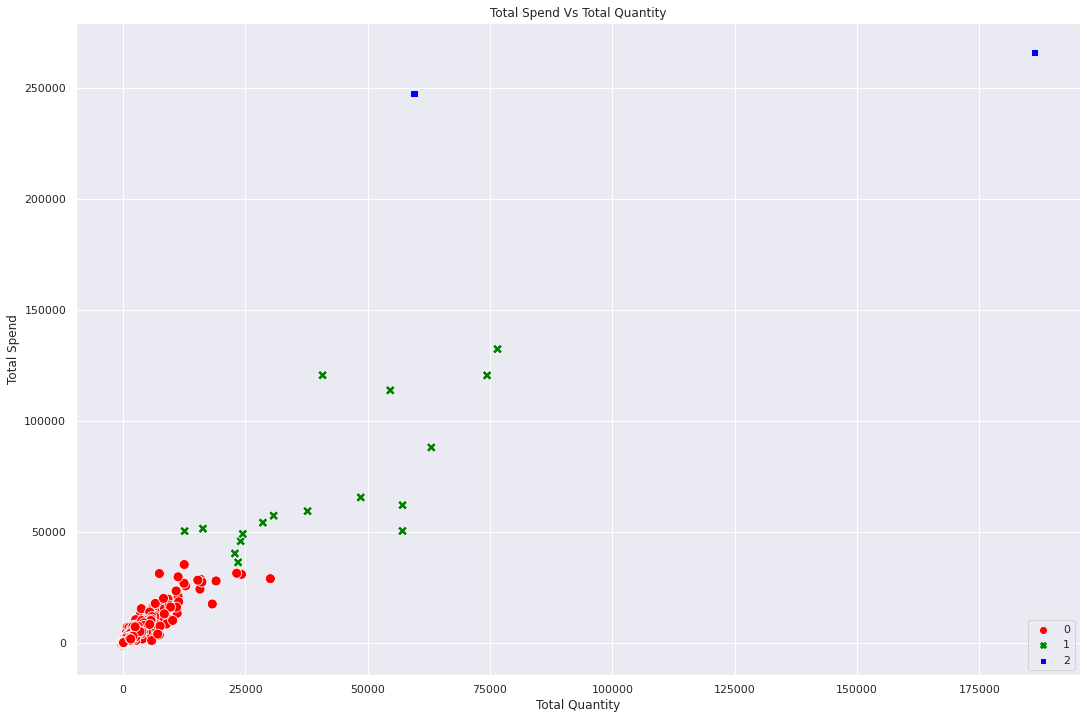

In [ ]:
#Scatter plot of the clusters
plt.figure(figsize=(18,12))
sns.scatterplot(x='total_quantity',y='total_spend',style='Cluster_label',hue='Cluster_label',palette=['red','green','blue'],legend='full',data=df_kmeans,s=100)
plt.xlabel('Total Quantity')
plt.ylabel('Total Spend') 
plt.title('Total Spend Vs Total Quantity')
plt.legend(loc='lower right')
plt.show()


In [ ]:
#Creating input data for running several iterations of KMeans to find best value of number of clusters based on elbow method
X = complete_user_data_compiled[['total_quantity', 'avg_quantity', 'max_quantity',
       'min_quantity', 'median_quantity', 'total_spend', 'avg_spend',
       'max_spend', 'min_spend', 'median_spend', 'average_unique_items',
        'Total_visits', 'last_visit',
       'visit_last_60_days', 'No_of_days_taken_per_visit']]

X.head()

,total_quantity,avg_quantity,max_quantity,min_quantity,median_quantity,total_spend,avg_spend,max_spend,min_spend,median_spend,average_unique_items,Total_visits,last_visit,visit_last_60_days,No_of_days_taken_per_visit
0,2458,351.142857,676,192,315.0,4310.00,615.714286,1294.32,224.82,584.91,26.000000,7,1,1,52
1,2341,585.250000,1254,217,435.0,1797.24,449.310000,892.80,227.44,338.50,6.750000,4,74,0,70
2,631,631.000000,631,631,631.0,1757.55,1757.550000,1757.55,1757.55,1757.55,73.000000,1,18,1,0
3,197,197.000000,197,197,197.0,334.40,334.400000,334.40,334.40,334.40,17.000000,1,309,0,0
4,470,42.727273,127,-63,52.0,1545.41,140.491818,840.30,-463.80,160.33,8.363636,11,35,1,23


In [ ]:
#Preparing elbow curve to identify the optimal number of clusters
wcss = []
for i in range(1,16):
  km = KMeans(n_clusters=i)
  km.fit(X)
  wcss.append(km.inertia_)

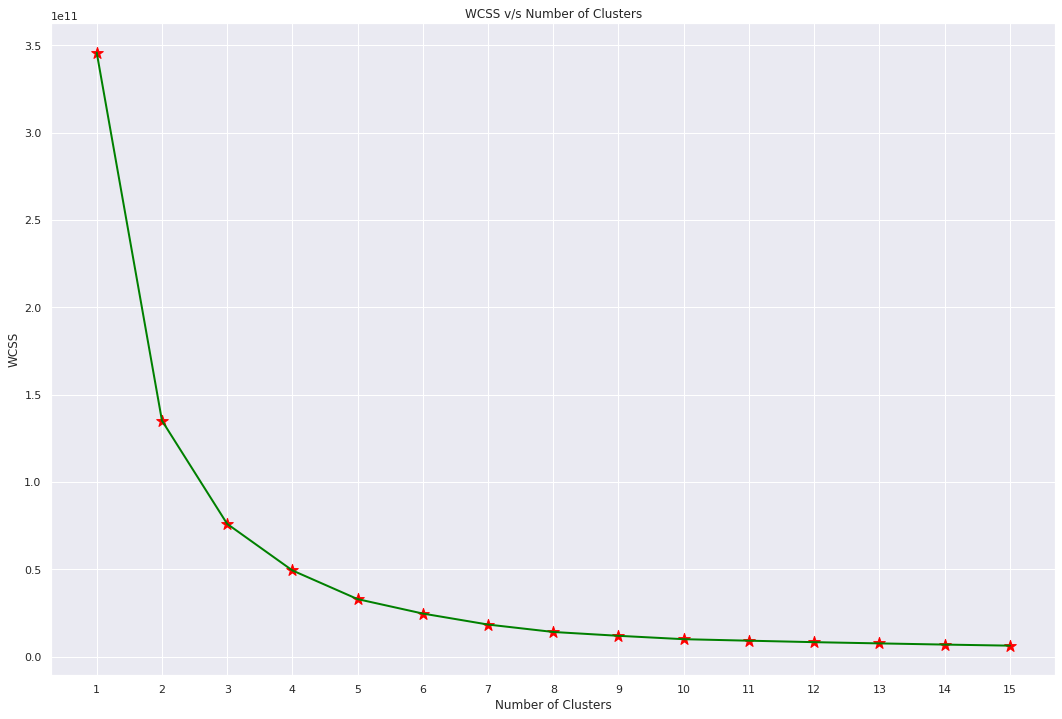

In [ ]:
#Plotting the elbow curve to estimate the optimal number of clusters
plt.figure(figsize=(18,12))
plt.plot(range(1,16),wcss,linewidth=2,color='green')
plt.scatter(range(1,16),wcss,s=150,color='red',marker="*")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.title("WCSS v/s Number of Clusters")
plt.xticks(np.arange(1,16,1))
plt.show()

In [ ]:
#From the plot above it is clear that the elbow method specifies an optimal number of clusters as 5
df_kmeans_5 = complete_user_data_compiled[['total_quantity', 'avg_quantity', 'max_quantity',
       'min_quantity', 'median_quantity', 'total_spend', 'avg_spend',
       'max_spend', 'min_spend', 'median_spend', 'average_unique_items',
        'Total_visits', 'last_visit',
       'visit_last_60_days', 'No_of_days_taken_per_visit']]

#Taking 5 clusters
km5 = KMeans(n_clusters=5)
#Fitting the input data on 5 clusters
km5.fit(df_kmeans_5)
#predicting the cluster labels of the input data
y = km5.predict(df_kmeans_5)
#adding the labels in a column called as cluster label
df_kmeans_5["Cluster_label"] = y
#The dataframe after the completion of KMeans clustering
df_kmeans_5.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


,total_quantity,avg_quantity,max_quantity,min_quantity,median_quantity,total_spend,avg_spend,max_spend,min_spend,median_spend,average_unique_items,Total_visits,last_visit,visit_last_60_days,No_of_days_taken_per_visit,Cluster_label
0,2458,351.142857,676,192,315.0,4310.00,615.714286,1294.32,224.82,584.91,26.000000,7,1,1,52,3
1,2341,585.250000,1254,217,435.0,1797.24,449.310000,892.80,227.44,338.50,6.750000,4,74,0,70,0
2,631,631.000000,631,631,631.0,1757.55,1757.550000,1757.55,1757.55,1757.55,73.000000,1,18,1,0,0
3,197,197.000000,197,197,197.0,334.40,334.400000,334.40,334.40,334.40,17.000000,1,309,0,0,0
4,470,42.727273,127,-63,52.0,1545.41,140.491818,840.30,-463.80,160.33,8.363636,11,35,1,23,0


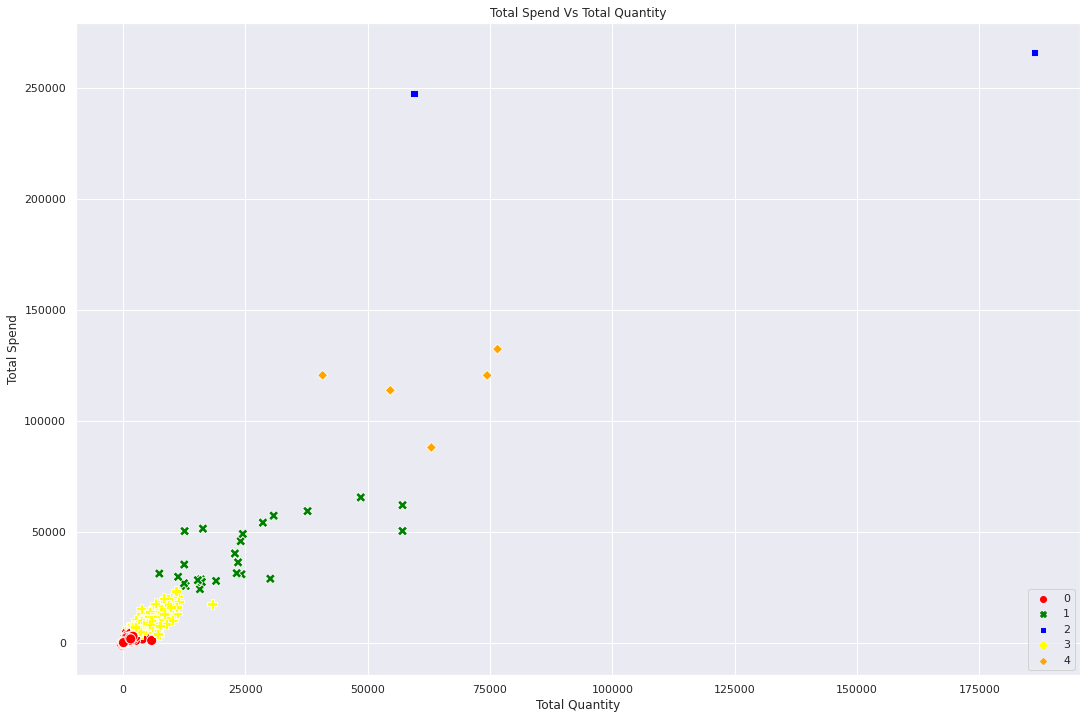

In [ ]:
#Scatter plot for 5 clusters
plt.figure(figsize=(18,12))
sns.scatterplot(x='total_quantity',y='total_spend',style='Cluster_label',hue='Cluster_label',palette=['red','green','blue','yellow','orange'],legend='full',data=df_kmeans_5,s=100)
plt.xlabel('Total Quantity')
plt.ylabel('Total Spend') 
plt.title('Total Spend Vs Total Quantity')
plt.legend(loc='lower right')
plt.show()


/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/us

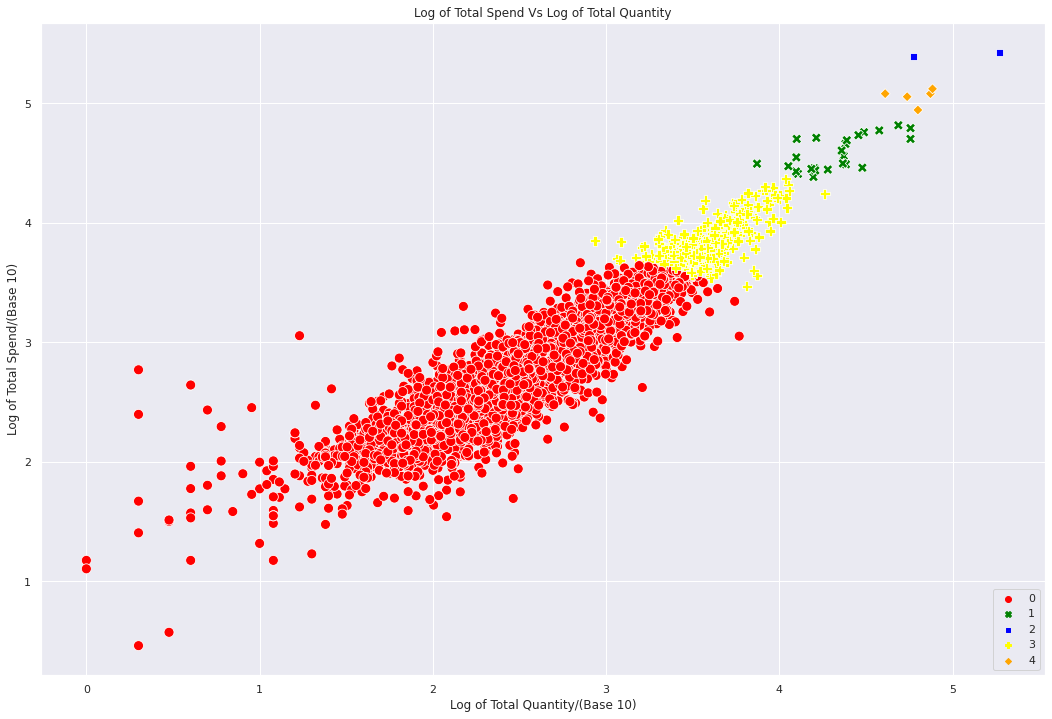

In [ ]:
#Transforming to log scale
df_kmeans_5["log_total_quantity"] = np.log10(df_kmeans_5["total_quantity"])
df_kmeans_5["log_total_spend"] = np.log10(df_kmeans_5["total_spend"])

#Scatter plot on log scale
plt.figure(figsize=(18,12))
sns.scatterplot(x='log_total_quantity',y='log_total_spend',style='Cluster_label',hue='Cluster_label',palette=['red','green','blue','yellow','orange'],legend='full',data=df_kmeans_5,s=100)
plt.xlabel('Log of Total Quantity/(Base 10)')
plt.ylabel('Log of Total Spend/(Base 10)') 
plt.title('Log of Total Spend Vs Log of Total Quantity')
plt.legend(loc='lower right')
plt.show()

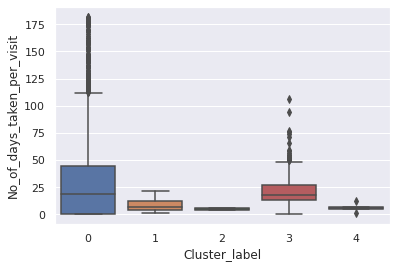

In [ ]:
#Boxplot of frequency of visit compared to number of clusters
sns.boxplot(x='Cluster_label',y='No_of_days_taken_per_visit',data=df_kmeans_5)

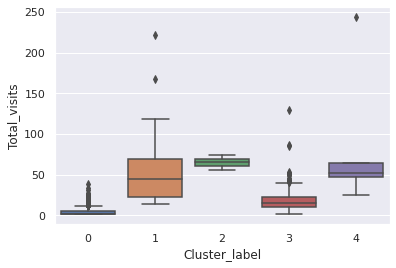

In [ ]:
#Boxplot of total visits compared to number of clusters
sns.boxplot(x='Cluster_label',y='Total_visits',data=df_kmeans_5)

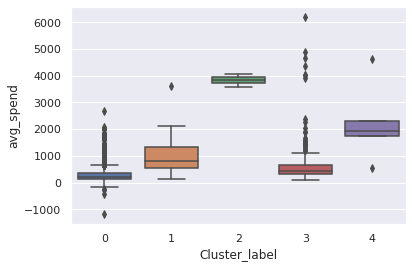

In [ ]:
#Boxplot of average spend compared to number of clusters
sns.boxplot(x='Cluster_label',y='avg_spend',data=df_kmeans_5)

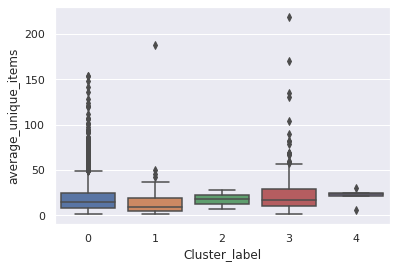

In [ ]:
#Boxplot of average unique items compared to number of clusters
sns.boxplot(x='Cluster_label',y='average_unique_items',data=df_kmeans_5)

In [223]:
#summary of users in clusters -- help in describing for business actionability

# Seg 0
data_0 = df_kmeans_5[df_kmeans_5.Cluster_label==0] 
data_0.head()
print("Seg_0")
print(data_0.describe())
print("\n\n------------------------------------------------------------\n\n")


# Seg 1
data_1 = df_kmeans_5[df_kmeans_5.Cluster_label==1] 
data_1.head()
print("Seg_1")
print(data_1.describe())
print("\n\n------------------------------------------------------------\n\n")


# Seg 2
data_2 = df_kmeans_5[df_kmeans_5.Cluster_label==2] 
data_2.head()
print("Seg_2")
print(data_2.describe())
print("\n\n------------------------------------------------------------\n\n")


# Seg 3
data_3 = df_kmeans_5[df_kmeans_5.Cluster_label==3] 
data_3.head()
print("Seg_3")
print(data_3.describe())
print("\n\n------------------------------------------------------------\n\n")

# Seg 4
data_4 = df_kmeans_5[df_kmeans_5.Cluster_label==4] 
data_4.head()
print("Seg_4")
print(data_4.describe())
print("\n\n------------------------------------------------------------\n\n")

Seg_0
       total_quantity  avg_quantity  max_quantity  min_quantity  \
count     4011.000000   4011.000000   4011.000000   4011.000000   
mean       540.113937    168.764497    266.169783     89.556220   
std        580.172844    158.495313    233.370157    167.637337   
min       -336.000000   -244.000000   -244.000000  -1228.000000   
25%        142.000000     74.000000    112.000000     -2.000000   
50%        320.000000    130.000000    203.000000     49.000000   
75%        750.000000    217.125000    352.000000    132.500000   
max       5863.000000   2924.000000   2924.000000   2924.000000   

       median_quantity  total_spend    avg_spend    max_spend    min_spend  \
count      4011.000000  4011.000000  4011.000000  4011.000000  4011.000000   
mean        162.645101   905.380811   279.952448   427.423643   148.583885   
std         161.537630   893.586337   225.539944   335.185163   261.062614   
min        -244.000000 -1192.200000 -1192.200000 -1192.200000 -3528.340000   
